In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings  

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "../Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
sc_df_market_data = StandardScaler().fit_transform(df_market_data)

In [7]:
sc_df_market_data[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
# Create a DataFrame with the scaled data
sc_df_market_data = pd.DataFrame(data=sc_df_market_data, 
                                 index=df_market_data.index,
                                 columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                          'price_change_percentage_14d', 'price_change_percentage_30d',
                                          'price_change_percentage_60d', 'price_change_percentage_200d',
                                          'price_change_percentage_1y'])

# Copy the crypto names from the original data
sc_df_market_data['coin_id'] = df_market_data.index

# Set the coinid column as index
sc_df_market_data.set_index('coin_id', inplace=True)

# Display sample data
sc_df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(df_market_data)
    inertia.append(k_model.inertia_)


C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to 

In [11]:
# Create a dictionary with the data to plot the Elbow curve
market_data_elbow = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_market_data_elbow = pd.DataFrame(market_data_elbow)

# Review the DataFrame
df_market_data_elbow.head()


,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05


In [12]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
kmeans_elbow = df_market_data_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="K-Means Elbow Curve",
    color='g',
    xticks=k
)
kmeans_elbow

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is where the plot shows a noticeable or slowing bend, indicating the optimal number of clusters. In this dataset, 3 is a reasonable value as it is the last noticable bend. 2 and 4 are also options, however selecting these could impact later clustering.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)

In [14]:
# Fit the K-Means model using the scaled data
model.fit(sc_df_market_data)

C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_predictions = model.predict(sc_df_market_data)

# Print the resulting array of cluster values.
print(crypto_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [16]:
# Create a copy of the DataFrame
df_crypto_predictions = sc_df_market_data.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_crypto_predictions['price_prediction'] = crypto_predictions

# Display sample data
df_crypto_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,price_prediction
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

kmeans_cluster = df_crypto_predictions.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    title="K-Means Clustering",
    by='price_prediction',
    hover_cols='coin_id'
)
kmeans_cluster

:NdOverlay   [price_prediction]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_data = pca.fit_transform(sc_df_market_data)

# View the first five rows of the DataFrame. 
pca_data = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])
pca_data.head(10)

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


In [21]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance = 0.3719856 + 0.34700813 + 0.17603793. The total explained variance of the three principal components is 0.895 (or 89.5%), which indicates how much of the original dataset is explained by these three principal components.

In [22]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(data=pca_data,
                          columns=["PCA1", "PCA2", "PCA3"])


# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_market_data.index

# Set the coinid column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
df_pca_data.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
pca_k = list(range(1, 11))

In [24]:
# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in pca_k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(df_pca_data)
    pca_inertia.append(k_model.inertia_)


C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to 

In [25]:
# Create a dictionary with the data to plot the Elbow curve
pca_data_elbow = {"pca_k": pca_k, "pca_inertia": pca_inertia}

# Create a DataFrame using the elbow_data Dictionary
df_pca_data_elbow = pd.DataFrame(pca_data_elbow)

# Review the DataFrame
df_pca_data_elbow.head()

,pca_k,pca_inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792


In [26]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
pca_elbow = df_pca_data_elbow.hvplot.line(
    x="pca_k",
    y="pca_inertia",
    title="PCA Elbow Curve",
    color='purple',
    xticks=pca_k
)
pca_elbow

:Curve   [pca_k]   (pca_inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is where the plot shows a noticeable or slowing bend, indicating the optimal number of clusters. In this PCA modeled dataset, 4 is a reasonable value as it is the last noticable bend.



* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** KMeans elbow chart indicated the reasonable selection of k = 3 with options to pick 2 or 4, however PCA elbow chart indicates k = 4 as the best option.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=4) 

In [28]:
# Fit the K-Means model using the PCA data
pca_model.fit(df_pca_data)

C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gfoley\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_crypto_predictions = pca_model.predict(df_pca_data)

# Print the resulting array of cluster values.
print(pca_crypto_predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [30]:
# Create a copy of the DataFrame with the PCA data
df_pca_crypto_predictions = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_crypto_predictions['pca_price_prediction'] = pca_crypto_predictions

# Display sample data
df_pca_crypto_predictions.head(10)


,PCA1,PCA2,PCA3,pca_price_prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_cluster = df_pca_crypto_predictions.hvplot.scatter(
    x='PCA1', 
    y='PCA2',
    title="PCA Clustering",
    by='pca_price_prediction',
    hover_cols='coin_id'
)
pca_cluster

:NdOverlay   [pca_price_prediction]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [32]:
# Composite plot to contrast the Elbow curves
(kmeans_elbow + pca_elbow).cols(1)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [pca_k]   (pca_inertia)

In [33]:
# Composite plot to contrast the clusters
(kmeans_cluster + pca_cluster).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [price_prediction]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_price_prediction]
      :Scatter   [PCA1]   (PCA2,coin_id)

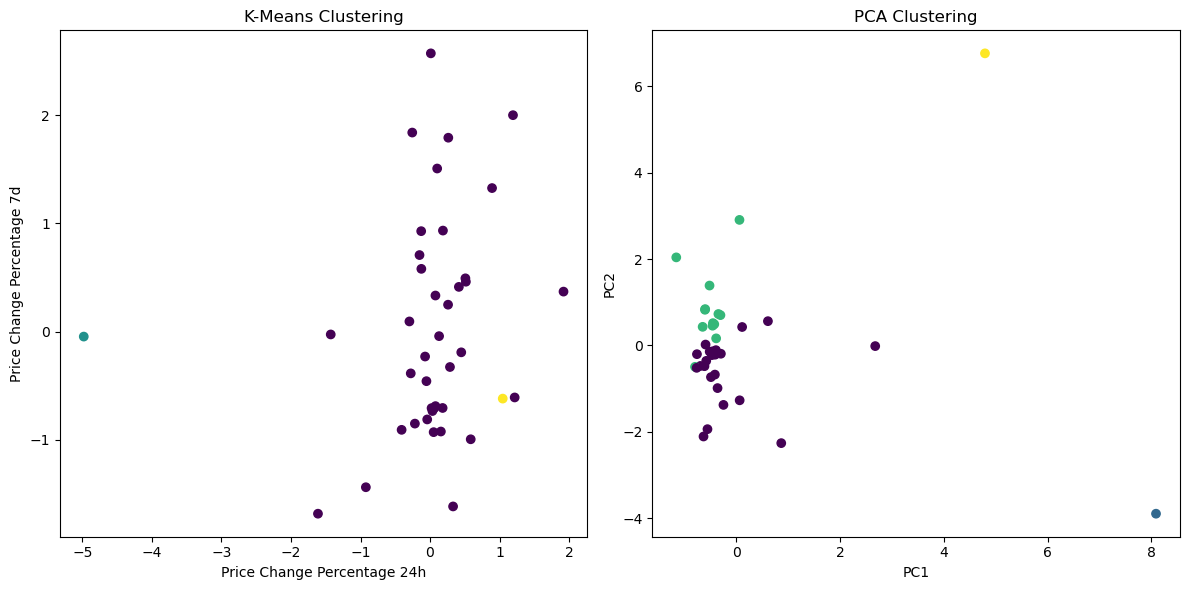

In [35]:
# Composite plot to contrast the clusters - using matplotlib
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original scatter plot
ax1.scatter(df_crypto_predictions['price_change_percentage_24h'],
            df_crypto_predictions['price_change_percentage_7d'],
            c=df_crypto_predictions['price_prediction'])
ax1.set_xlabel('Price Change Percentage 24h')
ax1.set_ylabel('Price Change Percentage 7d')
ax1.set_title('K-Means Clustering')

# Plot the PCA scatter plot
ax2.scatter(df_pca_crypto_predictions['PCA1'],
            df_pca_crypto_predictions['PCA2'],
            c=df_pca_crypto_predictions['pca_price_prediction'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Clustering')

# Adjust spacing between subplots
fig.tight_layout()

# Display the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** When reviewing the cluster analysis results of KMeans and PCA, the PCA Clustering is easier to interpret or understand due to the reduced dimensionality. With the data reduction of PCA, there are fewer features considered but more relevant data points which provides an improved clustering accuracy without added noise or unnecessary data points impacting the model predictions.